In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import pickle

In [2]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#finding size of dataframe
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#renaming the columns for easier use
df.rename(columns={'SepalLengthCm': 'sepalLength', 'SepalWidthCm': 'sepalWidth', 'PetalLengthCm': 'petalLength', 'PetalWidthCm': 'petalWidth', 'Species': 'species'}, inplace=True)
df.rename(columns={'Id': 'id'}, inplace=True)

In [6]:
df

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df['species'].value_counts().to_list()

[50, 50, 50]

In [8]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [9]:
df

,id,sepalLength,sepalWidth,petalLength,petalWidth,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [10]:

df = df.drop('id', axis=1)

In [11]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Visualization of Dataset

In [12]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


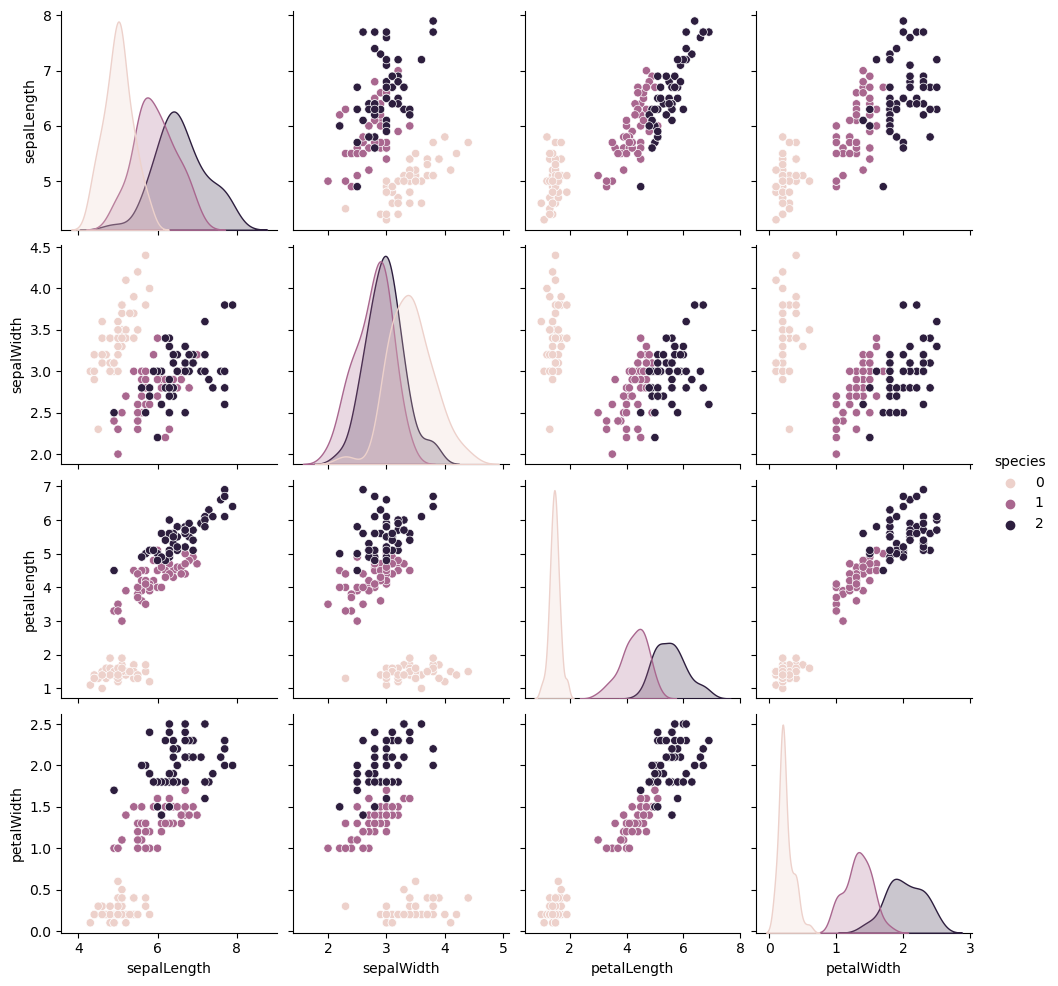

In [13]:
sns.pairplot(df, hue='species')

In [14]:
#splitting the data into features and target
x = df.drop('species', axis=1)
y = df['species']


In [15]:
x


,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [17]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

In [18]:
#creating objects of the ML models
lr = LogisticRegression()
lr

LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred

array([1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 2], dtype=int64)

In [22]:
print("Logistic Regression:")
cfn_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cfn_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))

Logistic Regression:
Confusion Matrix:
 [[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy: 0.9333333333333333


In [23]:
with open('model.pkl',"wb")as file:
    pickle.dump(lr,file)

In [24]:
x.columns.value_counts().to_list()

[1, 1, 1, 1]

In [25]:
x.head(1)

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2


In [26]:
lr.predict([[5.1,3.5,1.4,.2]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)